# Iris Dataset - Data Exploration
**Technique:** Descriptive Statistics<br>
**Guiding Documentation:** "Data Science: Concepts and Practice" - Kotu/Deshpande Chapter 3 (Book: [amazon](https://www.amazon.ca/Predictive-Analytics-Data-Mining-Concepts/dp/012814761X) [official](http://www.introdatascience.com/))<br>
- **Goal:** reproduce figures in chapter<br>
- **Process:** "3.5 ROADMAP FOR DATA EXPLORATION" - Steps 1-4, 6-8<br>
    1. Organize the dataset<br><br>
    **Univariate**
    2. Centrality
    3. Spread
    4. Distributions
    5. (SKIP: Pivot Tables)
    6. Outliers<br><br>
    **Multivariate**
    7. Correlation Values
    8. Scatter Plots
    9. (SKIP: High-dimensional visualizations)<br>

**Idea:** *Univariate: what does each attribute "look like"?* *Multivariate: how do they "correlate with each other"?*<br>
**Math:** mean (u), median, mode, standard deviation (SD), distributions (KDE, normal), correlation (r, rho, tau)<br>
**Dataset(s):** [Iris Data Set (UCI ML)](https://archive.ics.uci.edu/ml/datasets/iris)<br>
**Python:** Pandas, NumPy, matplotlib [Real Python - Data Science Core](https://realpython.com/learning-paths/data-science-python-core-skills/)<br>
**Tuning Parameters (<):** SD "ddof" (N vs N-1), box plot whisker value, histogram binning, KDE bandwidth, correlation method<br>
**Advantages (+):**<br>
**Disadvantages (-):**<br>
**Caveats (\*):**

What do these Iris flowering plants, made famous by Ronald Fisher's work, really look like?<br>

From Yong Cui's [article](https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5):<br>
Petals & Sepals for Iris setosa, Iris versicolor, and Iris virginica (Sources:
[1](https://commons.wikimedia.org/wiki/Category:Iris_setosa#/media/File:Irissetosa1.jpg), 
[2](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg),
[3](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_virginica.jpg), 
Licenses: Public Domain, CC BY-SA 3.0 & CC BY-SA 2.0)
![Iris sepals and petals](./images/the-iris-dataset-a-little-bit-of-history-and-biology-1_f6KbPXwksAliMIsibFyGJw.png)

## Preamble
Import libraries: NumPy, **Pandas**<br>

In [1]:
import numpy as np
import pandas as pd

#Output mode switching: show all or only "last expression" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#InteractiveShell.ast_node_interactivity = 'last_expr'

## 1. Organize the dataset
### Read from CSV
[Read in](https://realpython.com/lessons/importing-csv-data-pandas-dataframe/) the **Iris Data Set** into a Pandas [DataFrame](https://realpython.com/pandas-python-explore-dataset/#accessing-dataframe-elements).<br>
Setup column names for attributes (4) and class label as below.<br>
The "sepal" is the outer leaf, the "petal" is the inner flower.<br>
1. sepal length in cm (sl)
2. sepal width in cm (sw)
3. petal length in cm (pl)
4. petal width in cm (pw)
5. class (species):
    - Iris-setosa
    - Iris-versicolor
    - Iris-virginica
**Notes:**<br>
- column names not included in .data

In [2]:
columns = ['sl', 'sw', 'pl','pw','species']
df_iris = pd.read_csv('./data/iris.data', names=columns)
#df_iris.head()
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check data types
From `info()` above, the four attributes' are all numeric continuous (cm to 1 decimal place) and assigned `float64` [data type](https://realpython.com/pandas-python-explore-dataset/#specifying-data-types).<br>The class `species` is non-ordered categorical/nominal and initially assigned `object` ("catch-all" for strings) data type. Since there are only three unique "classes" with 50 instances each, change `species` to **Pandas** `category` data type for better performance.

In [3]:
df_iris['species'].nunique()
df_iris['species'].value_counts()
df_iris['species'] = pd.Categorical(df_iris['species'])
df_iris.info()

3

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sl       150 non-null    float64 
 1   sw       150 non-null    float64 
 2   pl       150 non-null    float64 
 3   pw       150 non-null    float64 
 4   species  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


### Check missing values
From `info()` above, all columns are fully "non-null" so there are no [missing values](https://realpython.com/pandas-python-explore-dataset/#missing-values).<br>
Otherwise, we can use `.dropna()` or `.fillna(...)` for the missing data.<br>
Still use `.isnull()` to check, equivalent to `.isna()`

In [4]:
df_iris.isnull().sum().sum()
df_iris.isnull().any().any() #returns whether any element is True

0

False

## 2. Centrality
### Centrality per-attribute - entire dataset
Calculate and compare [measures of centrality](https://realpython.com/python-statistics/#measures-of-central-tendency): mean, median, and mode of four attributes for the entire dataset.<br>

**Python - Pandas:**
- `.agg` *apply Aggregation (Series to scalar) function(s)*
- `.apply` *apply any one function*

In [5]:
#Original "manual" code
#df_iris_centrality = pd.DataFrame(
#    [df_iris.mean().round(3), df_iris.median()], #each method returns Series
#    index=['means', 'medians'],
#    columns=df_iris.columns)
#df_iris_centrality = pd.concat([df_iris_centrality, df_iris.mode()]) #mode() returns DataFrame (for multiple modes)
#df_iris_centrality

#Improved "Pythonic" code
df_iris.agg(["mean", "median"]).round(3)
df_iris.apply(lambda x: x.mode())

,sl,sw,pl,pw
mean,5.843,3.054,3.759,1.199
median,5.800,3.000,4.350,1.300


,sl,sw,pl,pw,species
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


**Figure 3.2 - Descriptive Statistics for Iris dataset: CORRECT**
- "Average" = mean

**Notes:**
- start with: **median** divides the dataset in half (i.e. histogram "area")
- mean difference can indicate (unbalanced) outliers and is also affected by multi-modal<br>
- mode difference can indicate multi-modal (non-normal) distribution

**Observations:**
- sw (all three measures ~3.0), then sl, look like the most normal distributions with no/balanced outliers
- pl and pw look **multi-modal** with large mode vs. median differences

### Centrality per-attribute by-class
Calculate and compare [measures of centrality](https://realpython.com/python-statistics/#measures-of-central-tendency) of four attributes across each class of species.<br>

**Python - Pandas:**
- `.groupby` *splits data (e.g. by column values) into DataFrameGroupBy objects*

In [6]:
df_iris.groupby('species').agg(['mean', 'median']).round(3)
df_iris.groupby('species').apply(lambda x: x.mode())

sl            sw            pl            pw       
                  mean median   mean median   mean median   mean median
species                                                                
Iris-setosa      5.006    5.0  3.418    3.4  1.464   1.50  0.244    0.2
Iris-versicolor  5.936    5.9  2.770    2.8  4.260   4.35  1.326    1.3
Iris-virginica   6.588    6.5  2.974    3.0  5.552   5.55  2.026    2.0

sl   sw   pl   pw          species
species                                               
Iris-setosa     0  5.0  3.4  1.5  0.2      Iris-setosa
                1  5.1  NaN  NaN  NaN              NaN
Iris-versicolor 0  5.5  3.0  4.5  1.3  Iris-versicolor
                1  5.6  NaN  NaN  NaN              NaN
                2  5.7  NaN  NaN  NaN              NaN
Iris-virginica  0  6.3  3.0  5.1  1.8   Iris-virginica

**Table 3.1 Iris dataset and descriptive statstics (Iris-setosa): CORRECT**

**Notes:**
- multi-modal cases of sl are contiguous values so they do not indicate multi-modal distribution

**Observations:**
- confirming from above **Centrality per-attribute - entire dataset**, sepal attributes (sl, sw) have similar distributions across class while **petal attributes (pl, pw)** have more separated distributions across classes with **Iris-setosa** being most separated (smaller petal lengths and widths)

## 3. Spread
### Spread per-attribute - entire dataset

Calculate and compare [measures of variability](https://realpython.com/python-statistics/#measures-of-variability): range and Standard Deviation (SD) of four attributes for the entire dataset.<br>
Compare SD to mean to understand spread of data, and both to range (min, max) for outliers.<br>

**Python:**
- use `describe()` to sanity check attributes: mean, std, min/max/quartiles of data set.<br>
- `describe()` can also be used for non-numeric data type `species`, but shows some different information

In [7]:
df_iris.describe().round(3)
df_iris.std()/df_iris.mean()
#df_iris.describe(include='category')

,sl,sw,pl,pw
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


sl    0.141711
sw    0.141976
pl    0.469427
pw    0.636675
dtype: float64

**Figure 3.2 - Descriptive Statistics for Iris dataset: CORRECT**

**Notes:**
- actual numbers for min, max, SD give finiteness/bounds to the **Centrality** measures
- IF an attribute conforms with the "normal distribution", 68% of data points lie within +/- 1SD of mean
- SD's can be difficult to compare, could [normalize](https://en.wikipedia.org/wiki/Coefficient_of_variation) using **Relative SD** = SD/mean with (+)/(-) caveats

**Observations:**
- As expected, petal attributes show the largest spread (because multi-modal):
    - **petal length** has the largest range and SD
    - **petal width** has the largest Relative SD at 64%

### Spread per-attribute per-class
Calculate and compare [measures of variability](https://realpython.com/python-statistics/#measures-of-variability): range and Standard Deviation (SD) of four attributes within each class of species.<br>
Compare SD to mean to understand spread of data, and both to range (min, max) for outliers.<br>

In [8]:
#df_iris.groupby('species').describe() #works but table too wide across (32 columns)
df_iris.groupby('species').agg(['mean', 'std', 'min', 'max']).round(3)
df_iris.groupby('species').std()/df_iris.groupby('species').mean()

sl                      sw                      pl         \
                  mean    std  min  max   mean    std  min  max   mean    std   
species                                                                         
Iris-setosa      5.006  0.352  4.3  5.8  3.418  0.381  2.3  4.4  1.464  0.174   
Iris-versicolor  5.936  0.516  4.9  7.0  2.770  0.314  2.0  3.4  4.260  0.470   
Iris-virginica   6.588  0.636  4.9  7.9  2.974  0.322  2.2  3.8  5.552  0.552   

                              pw                   
                 min  max   mean    std  min  max  
species                                            
Iris-setosa      1.0  1.9  0.244  0.107  0.1  0.6  
Iris-versicolor  3.0  5.1  1.326  0.198  1.0  1.8  
Iris-virginica   4.5  6.9  2.026  0.275  1.4  2.5

,sl,sw,pl,pw
species,,,,
Iris-setosa,0.070413,0.111476,0.118519,0.439383
Iris-versicolor,0.086956,0.113285,0.110308,0.149135
Iris-virginica,0.096521,0.108439,0.099405,0.135563


**Table 3.1 Iris dataset and descriptive statstics (Iris-setosa): CORRECT**

**Notes:**
- eyeball for each attribute-species: how many SD's from mean to min/max? For normal distribution:
    - +/- SD = 68%
    - +- 2SD = 95%
    - +/- 3SD = 99.7%

**Observations:**
- each attribute's per-class SD's are all lower than their entire dataset SD's
- min/max are within 3SDs of mean for each attribute-species
- **petal width** for Iris-setosa has largest Relative SD at 44% but consider small/est "mean" as denominator
    - petal width for other species have next largest Relative SDs at 14-15% but consider small "means"
    - all others are low at 7-12%

### Standard Deviation: Population (N) vs. Sample (N-1)
The SD formula differs between Population (Np) vs Sample (Ns-1) [(excellent explanation!)](https://tinystats.github.io/teacups-giraffes-and-statistics/04_variance.html#population_vs_sample_((n)_vs_(n-1)) because the sample mean Ns is "too perfect" and requires "Bessel's correction" to use Ns-1.<br>
Check sample (N-1) vs population (N) means for four attributes by changing `ddof` value from 1 (Pandas default) to 0 (NumPy default).

In [9]:
df_iris.std().round(3)

sl    0.828
sw    0.434
pl    1.764
pw    0.763
dtype: float64

In [10]:
df_iris.std(ddof=0).round(3) #ddof - delta degrees of freedom

sl    0.825
sw    0.432
pl    1.759
pw    0.761
dtype: float64

**Observations:**
- Book also uses sample N-1 (corrects for the "too perfect" sample mean)
- Using uncorrected N formula does reduce the SD as expected (does not correct the "too perfect" sample mean)

### Standard Deviation: Population (N) vs. Sample (N-1), continued
Since I find this so interesting, let's do an experiment.<br>
Does SD really minimize if we use the uncorrected N for smaller and smaller samples?<br>
Just for sepal length, randomize using `.sample()` and repeat to get the average (mean) of those samples for n=50 and n=10.

In [11]:
sd_ddof = 0; #0 - population mean, 1 - sample mean
repeats = 100;

df_iris['sl'].sample(n=150).std(ddof=sd_ddof).round(3) #full sample

sd_list = [df_iris['sl'].sample(n=50).std(ddof=sd_ddof).round(3) for _ in range(repeats)]
np.mean(sd_list).round(3)

sd_list = [df_iris['sl'].sample(n=10).std(ddof=sd_ddof).round(3) for _ in range(repeats)]
np.mean(sd_list).round(3)

0.825

0.817

0.762

**Observations:**
- Yes!! Run a few times OR increase `repeats` OR toggle `sd_ddof`=[0,1] to check

## 2/3/6. Centrality/Spread/Outliers
### Box plot by-attribute - entire dataset

I'll be using Panda's [plotting](https://realpython.com/python-matplotlib-guide/#plotting-in-pandas) methods which are wrappers around Matplotlib `pyplot`.

[Box (-and-whisker) plots](https://realpython.com/python-statistics/#box-plots) show visually together:
- **Centrality**:
    - Median Q2 (50%) line
    - Mean line (not shown by default)
        - set `showmeans` to True
- **Spread**
    - "Box" size = Inter-Quartile Range (IQR) = Q3 (75%) - Q1 (25%)
- **Outliers**
    - "Whiskers" (end at 1.5\*IQR past boxes by default - Tukey's Rule)
        - Change to book's **5%, 95% quantiles** using Matplotlib parameter `whis`
    - "Outliers" ("flier points") are beyond whiskers

**Python - Pandas/Matplotlib:**
- don't need `plt.subplots()` when using **Pandas** `.plot.*()` wrappers
- don't need `plt.show()` in an interactive shell (IPython/Jupyter)

In [12]:
df_iris.quantile([1, 0.95, 0.75, 0.5, 0.25, 0.05, 0]) #Descending order to compare with Box Plot

,sl,sw,pl,pw
1.00,7.900,4.400,6.90,2.5
0.95,7.255,3.800,6.10,2.3
0.75,6.400,3.300,5.10,1.8
0.50,5.800,3.000,4.35,1.3
0.25,5.100,2.800,1.60,0.3
0.05,4.600,2.345,1.30,0.2
0.00,4.300,2.000,1.00,0.1


In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#InteractiveShell.ast_node_interactivity = 'all'
InteractiveShell.ast_node_interactivity = 'last_expr' #default

import math #needed for floor, ceil in plotting setup functions

<AxesSubplot:title={'center':'Box plot for Iris Data Set'}, ylabel='centimetres'>

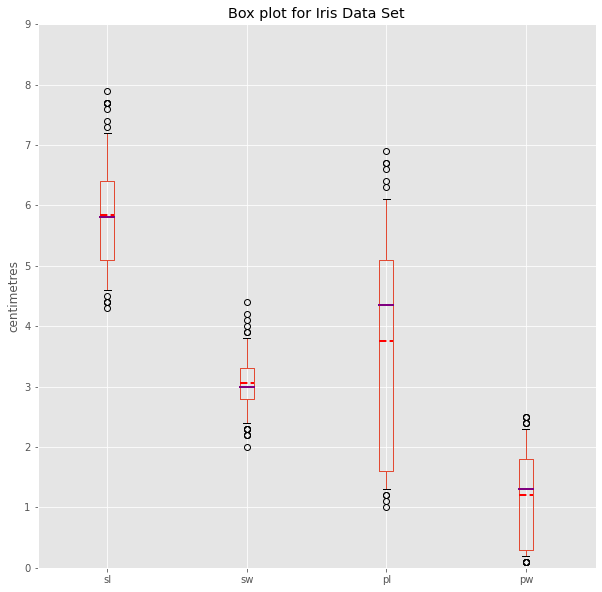

In [14]:
#DataFrame auto: DATA (from values), labels (from columns with numeric data)
df_iris.plot.box(title='Box plot for Iris Data Set', ylabel='centimetres', ylim=(0,9),
                     medianprops={'linewidth': 2, 'color': 'purple'},
                     showmeans=True, meanline=True, meanprops={'linewidth': 2, 'color': 'red'},
                     whis=(5,95), #default whis=1.5*IQR
                     figsize=(10,10), #width, height
                     widths=(0.1)) #skinnier like book
#plt.savefig('images/iris_boxplot_by_attribute.png')

**Figure 3.7 - Quartile plot of Iris dataset: CORRECT**
- **SOLVED!:** book's whiskers use **5%, 95% quantiles** (+/- 2SD for normal distribution)
- Missing: `plt.boxplot` doesn't show SD (+/- 1SD) vertical line

**Notes:**
- whisker lines can vary between lower/upper depending on data values falling within whisker range (N\*IQR or quantile)

**Observations**
- very easy to visually confirm **Centrality** and **Spread** observations above:
    - sepal attributes (sl, sw) have more normal looking distributions (mean ~= median, smaller IQR vs whiskers)
    - **petal attrbutes** (pl, pw) have less normal looking distributions:
        - median is closer to Q3 and > mean suggesting a "left or negative skew" (long negative tail) with [caveats](https://en.wikipedia.org/wiki/Skewness#Relationship_of_mean_and_median)
        - however, mode < median suggesting **multi-modal distributions**
        - the larger IQRs vs whiskers also suggest multi-modal distributions as values are spread across multiple modes

### Box plot per-attribute by-class

**Python - Pandas/Matplotlib:**
- Use `df.boxplot()` which has a "groupby" functionality built-in
    - by: "One box-plot will be done per value of columns in by."
    - column: if not specifying, creates a boxplot for each column (except those in "by")!
    - title is set automatically or using `plt.title()`

array([[<AxesSubplot:title={'center':'sl'}, xlabel='species'>,
        <AxesSubplot:title={'center':'sw'}, xlabel='species'>],
       [<AxesSubplot:title={'center':'pl'}, xlabel='species'>,
        <AxesSubplot:title={'center':'pw'}, xlabel='species'>]],
      dtype=object)

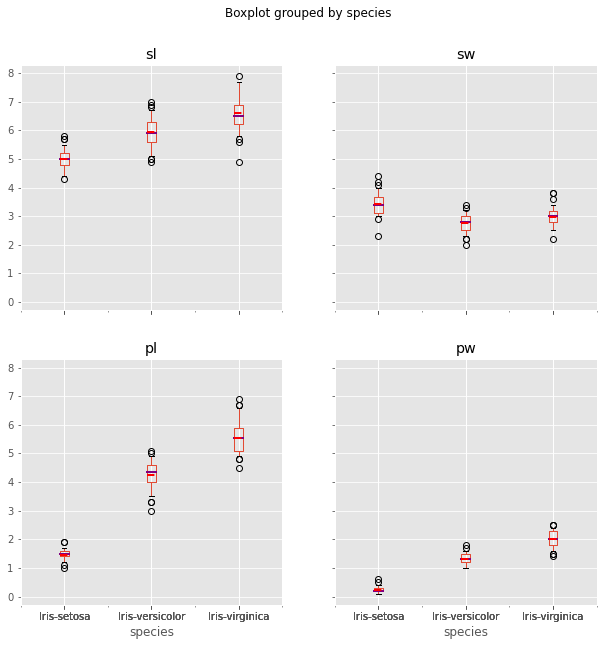

In [15]:
df_iris.boxplot(by='species', column=['sl', 'sw', 'pl', 'pw'],
                     medianprops={'linewidth': 2, 'color': 'purple'},
                     showmeans=True, meanline=True, meanprops={'linewidth': 2, 'color': 'red'},
                     whis=(5,95), #default whis=1.5*IQR
                     figsize=(10,10), #width, height #(20,20) for saving to PNG
                     widths=(0.1)) #skinnier like book
#plt.title('Box plot per-attribute by-class')
#plt.savefig('images/iris_boxplot_per_attribute_by_class.png')

**Figure 3.8 - Class-stratified quartile plot of petal length in Iris dataset: CORRECT**
- The class-stratified box plot also uses 5%, 95% quantiles

**Observations**<br>
Centrality/Spread
- sl for Iris-virginica shows slight right/positive skew (median < mean) (and mode < median from above)
- pl for Iris-versicolor shows slight left/negative skew (median > mean) (and mode > median from above)<br>

Spread
- as expected, sl and sw look the most normal still per-class
- pl does show most noticeable differences among classes confirming **Spread per-attribute - entire dataset** observations (largest range and SD)
- pw has larger IQRs compared to whiskers, suggested by larger Relative SDs per-class from **Spread per-attribute per-class**<br>

Outliers (most prominent)
- sl for Iris-virginica at 4.9 cm
- sw for Iris-setosa at 2.3 cm

## 4. Distributions
### Histograms per-attribute by-class
[Histograms](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas) plot "frequency of occurances" (y axis) vs "attribute values" (x axis).<br>
Histograms are the best way to visualize the **actual shape** of the distribution, including gaps, and modes which would not show up on a Box Plot.<br>

For **continuous numeric data**, specify **bins** (n equal divisions or specific ranges) to control x-granularity
- large bins miss precision vs. small bins show too much noise
- General rule: m-bins = SquareRoot(n-data_values) but n=150 (12 bins) is too small for this rule and its values are too spread out across the four attributes
- Use bin width equal to data granularity of **0.1 cm**

**Python:**
- **Pandas:**
    - Using `groupby` then `['attribute']` **outside** of `df.plot.hist` or `df.hist` is only way I could find to plot per-attribute histograms **stratified by class** (by colour!)
- **NumPy:** `numpy.arange` is useful here to specify `bins` edges, and `xticks` to show grid
    - **SOLVED!:** need to do `numpy.round_` on `numpy.arange` output, otherwise bin boundaries become *1.2000000000000002* due to "floating point rounding error", checked with `tolist()`
- **Matplotlib:** my first success with subplots ("axes") in one "figure"!!
    - solution: each individual axes[x,y] is passed as the `ax` parameter in the plotting function

- Define helper **functions** `histogram_bins` and `plot_setup`

In [16]:
def histogram_bins(d_min=0, d_max=10, d_binw=0.5):
    """Setup histogram binning based on (d)ata inputs using NumPy to create list of bin edges
    
    Parameters
    ----------
    d_min : first bin left edge (default=0)
    d_max : last bin left edge (default=10)
    d_binw : bin width
    
    Returns
    -------
    histogram_bins : ndarray
        Bin edges for `bins` input of Pandas/Matplotlib histogram methods
        Note: last bin is [d_max, d_max+d_binw]"""
        
    return np.round_(np.arange(d_min, d_max+(2*d_binw), d_binw), decimals=1) #2*d_binw so max value gets own bin

def plot_setup(
        wspace=0.1, hspace=0.3,
        xsetup=True,
        xd_min=0, xd_max=10, x_grid=1, xlabel='default x-axis label',
        x_padding=0,
        ysetup=False,
        yd_min=0, yd_max=10, y_grid=1, ylabel='default y-axis label',
        y_padding=0):
    """Matplotlib plotting customization
    
    Parameters
    ----------
    wspace : width space (horizontal) between subplots (default=0.1)
    hspace : height space (vertical) between subplots (default=0.3)
    xsetup : setups x-axis for all subplots (default=True)
    ysetup : setups y-axis for all subplots (default=False)
    x_padding : add to axis limits on both sides for outliers, Gaussian tails (default=0)
    y_padding : add to axis limits on both sides for outliers, Gaussian tails (default=0)
    ...
    
    Returns
    -------
    No return value"""
    
    #Spacing between subplots
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    #Setup x-axis label, limits, and grid spacing
    if xsetup:  
        x_min = math.floor(xd_min)-x_padding
        x_max = math.ceil(xd_max)+x_padding
        plt.setp(axes, xlabel=xlabel, xlim=[x_min, x_max], xticks=np.arange(x_min, x_max, x_grid))
    
    #Setup y-axis label, limits, and grid spacing
    if ysetup:
        y_min = math.floor(yd_min)-y_padding
        y_max = math.ceil(yd_max)+y_padding
        plt.setp(axes, ylabel=ylabel, ylim=[y_min, y_max], yticks=np.arange(y_min, y_max, y_grid))

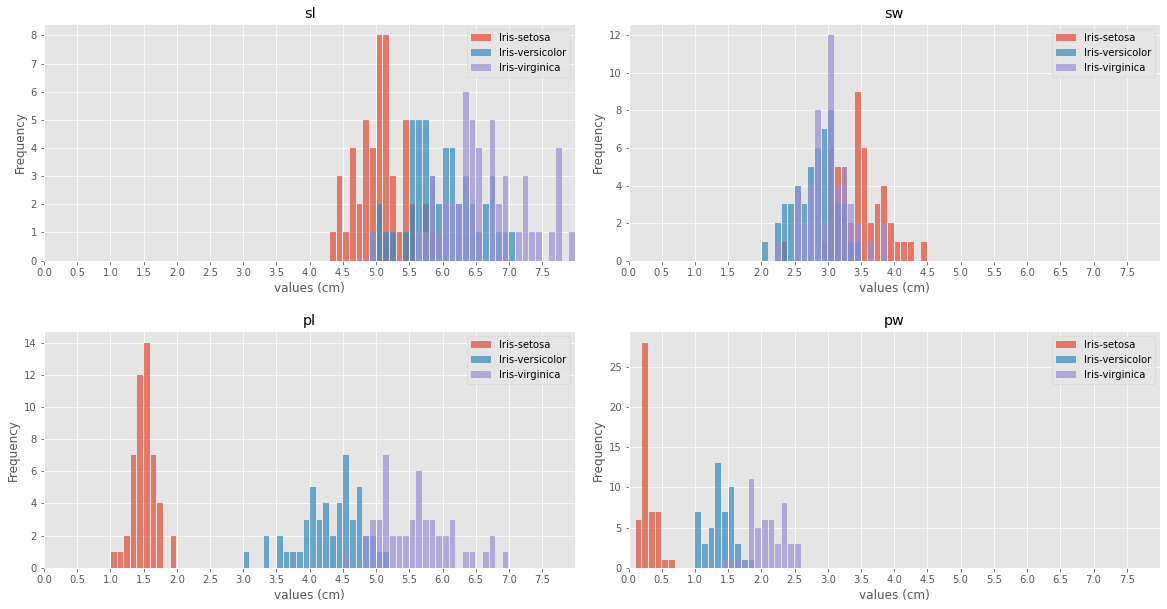

In [25]:
#create subplots: setup 2x2 Axes in one Figure 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
#setup plot grids based on (d)ata
d_tuple = (df_iris.min().min(), df_iris.max().max())
plot_setup(xd_min=d_tuple[0], xd_max=d_tuple[1], x_grid=0.5, xlabel='values (cm)')
#Histogram binning setup based on (d)ata, bin width = data granularity of 0.1 cm
d_bins = histogram_bins(d_min=d_tuple[0], d_max=d_tuple[1], d_binw=0.1)

columns = df_iris.columns.tolist()[0:-1] #all but last column 'species' (classes)
for idx, column in enumerate(columns):
    df_iris.groupby('species')[column].plot.hist(ax=axes[int(idx/2),idx%2], 
                                                 bins=d_bins,
                                                 rwidth=0.85, alpha=0.7, #from RealPython.com: alpha for transparency
                                                 title=column, legend=True)
#plt.savefig('images/iris_histograms_per_attribute_by_class.png')

**Figure 3.6 - Class-stratified histogram of petal length in Iris dataset: CORRECT**
- also uses 0.1 bin width

**Notes**
- Matplotlib's `alpha` transparency parameter helps to see overlapping class colors

**Observations**<br>
New observations:
- class-stratified distributions look mostly normal and unimodal (spikes may be due to small dataset?)
- **Iris-setosa (red)** has the smallest values of sl, pl, pw, but interestingly, the largest values of sw

Visually confirmed observations from **Box plot per-attribute by-class**:
- **pl** clearly the most class-differentiatied attribute, **sw** the least
- can see that **pl for Iris-versicolor** is left/negative skewed (mode to the right)
- less obvious to see that **sl for Iris-virginica** is right/positive skewed (mode to the left)

### Histogram + Box Plot + SD (one attribute)

Got this idea from [How to interpret](https://ms.mcmaster.ca/peter/s2ma3/s2ma3_9798/boxplots.html):
- graph historgram, then box plot horizontally below it to visualize all univariate statistics (so far) in one view
    - **important:** make sure both plots have same x-axis to best to use `plt.setp`
- try with a more normal distribution: sw - entire dataset
- add text to show SD, mean vaues

**Observations**
- this shows it all! Use going forward!

<AxesSubplot:xlabel='values (cm)'>

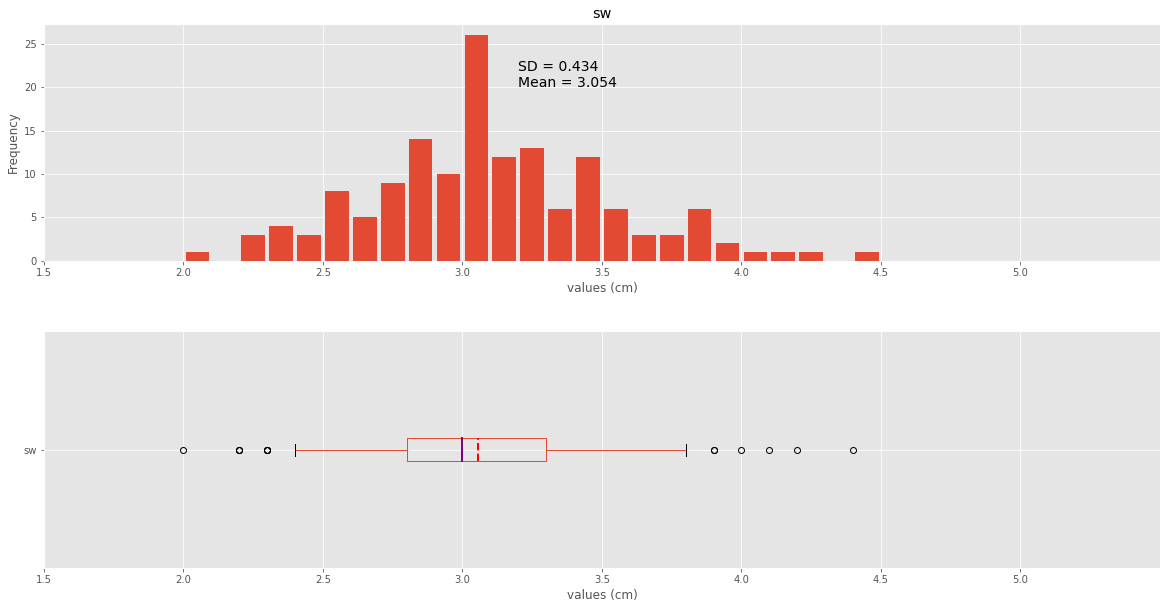

In [18]:
column = 'sw' #choose one to try
text_xy = (3.2,20) #Matplotlib text() uses data coordinates, need to adjust for each attribute's histogram

#create subplots: setup 2x1 Axes in one Figure 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
#setup plot grids based on (d)ata
d_tuple = (df_iris[column].min().min(), df_iris[column].max().max())
plot_setup(xd_min=d_tuple[0], xd_max=d_tuple[1], x_grid=0.5, xlabel='values (cm)', x_padding=0.5)
#Histogram binning setup based on (d)ata, bin width = data granularity of 0.1 cm
d_bins = histogram_bins(d_min=d_tuple[0], d_max=d_tuple[1], d_binw=0.1)

std_string = df_iris[column].std().round(3)
mean_string = df_iris[column].mean().round(3)
axes[0].text(text_xy[0], text_xy[1], f'SD = {std_string}\nMean = {mean_string}', fontsize=14)

df_iris[column].plot.hist(ax=axes[0],
                        bins=d_bins,
                        rwidth=0.85,
                        title=column)

df_iris[column].plot.box(ax=axes[1], vert=False, #horizontal!
                     medianprops={'linewidth': 2, 'color': 'purple'},
                     showmeans=True, meanline=True, meanprops={'linewidth': 2, 'color': 'red'},
                     whis=(5,95), #default whis=1.5*IQR
                     widths=(0.1)) #skinnier like book

### Kernel Density Estimate (KDE) (vs Histogram) per-attribute by-class
I discovered KDE from this [tutorial](https://realpython.com/python-histograms/#plotting-a-kernel-density-estimate-kde) and it's worth trying. Here is a great [video introduction](https://www.youtube.com/watch?v=x5zLaWT5KPs) of the concept.<br>
**Key idea:** this is an estimation from **real data** (i.e. "non-parametric") in contrast to the **normal distribution** assumption of fit (below).

**Python - Pandas**
- Kernel function: `plot.kde` uses `scipy.stats.gaussian_kde`, thus "Gaussian" function
    - need to import **SciPy** library
    - "h" control bandwidth: `bw_method` parameter (method name or number)
- [Histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)
    - `density`: *draw and return a probability density ... area under the histogram integrates to 1*
- Pandas plots on same Axes by default!

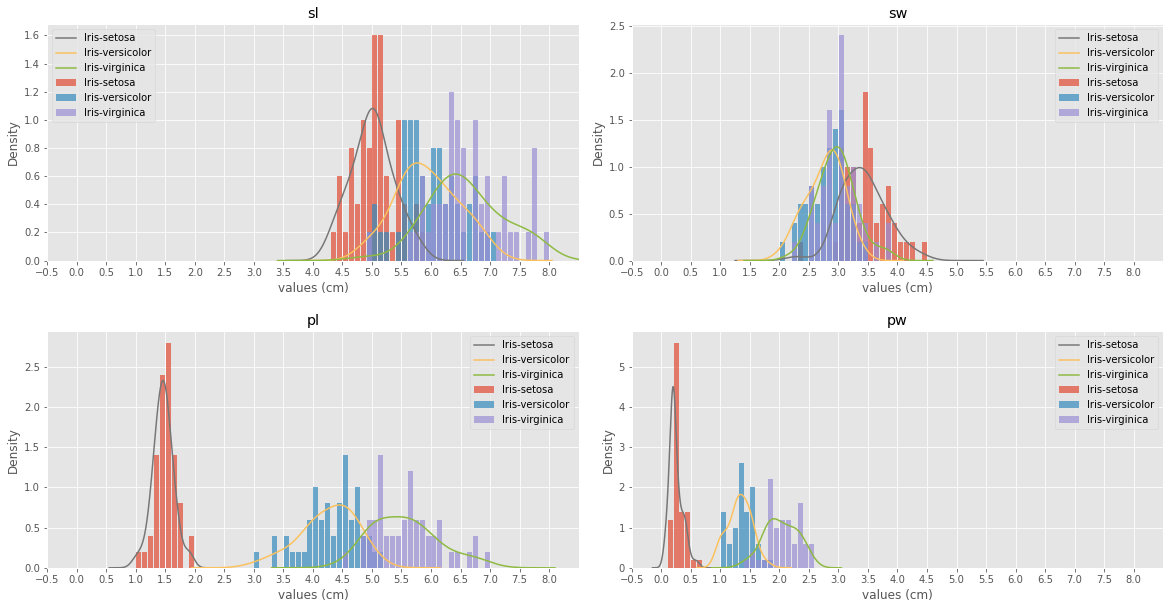

In [19]:
from scipy import stats

#create subplots: setup 2x2 Axes in one Figure 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
#setup plot grids based on (d)ata
d_tuple = (df_iris.min().min(), df_iris.max().max())
plot_setup(xd_min=d_tuple[0], xd_max=d_tuple[1], x_grid=0.5, xlabel='values (cm)', x_padding=0.5)
#Histogram binning setup based on (d)ata, bin width = data granularity of 0.1 cm
d_bins = histogram_bins(d_min=d_tuple[0], d_max=d_tuple[1], d_binw=0.1)

columns = df_iris.columns.tolist()[0:-1] #all but last column 'species' (classes)
for idx, column in enumerate(columns):
    df_iris.groupby('species')[column].plot.hist(ax=axes[int(idx/2),idx%2], 
                        density=True,
                        bins=d_bins,
                        rwidth=0.85, alpha=0.7,
                        title=column, legend=True)
    
    df_iris.groupby('species')[column].plot.kde(ax=axes[int(idx/2),idx%2],
                             bw_method=0.5, legend=True) #bw_method='scott' (default), 'silverman', scalar
    
#plt.savefig('images/iris_KDE_vs_histogram_per_attribute_by_class.png')

**Notes:**<br>
Histogram - Probability Density:
- y-axis of "density" is sensitive to **bin width**: density = counts / (sum(counts) * np.diff(bins)), so values can be > 1 (histogram Area still integrates to 1)

**Observations:**<br>
KDE:
- y-axis of KDE which is a "density" estimation can also have values > 1 (function Area still integrates to 1)
- "Scott", "Silverman" methods look OK when stratifying by-class
- bw_method = 0.5 looks OK when stratifying by-class
- larger bw_method = 1 indeed underfits the data
- smaller bw_method = 0.1 indeed overfits the data

### Normal Distribution Function (vs Histogram) per-attribute by-class

The Normal Distribution Function (which is a Probabiity Density Function (PDF)) is an "inherent assumption" (i.e. "parametric") which is only based on the **mean and Standard Deviation** of a dataset, and not individual data points. This "assumed" distribution follows the 68-95-99.7 rule:
- 68% of data points within +/- 1SD
- 95% of data points within +/- 2SD
- 99.7% of data points within +/- 3SD

**Python**
- a) there is no Pandas plottng method for a normal distribution function, must use **SciPy** `stats.norm.pdf` to generate "y = f(x)" input into **Matplotlib** plot(x, y)
- b) since there is no Pandas plotting method, after **Pandas** `groupby` (by-class), specify column (per-attribute), need to `apply` a `lambda` function call of **Matplotlib** plot(x, y)

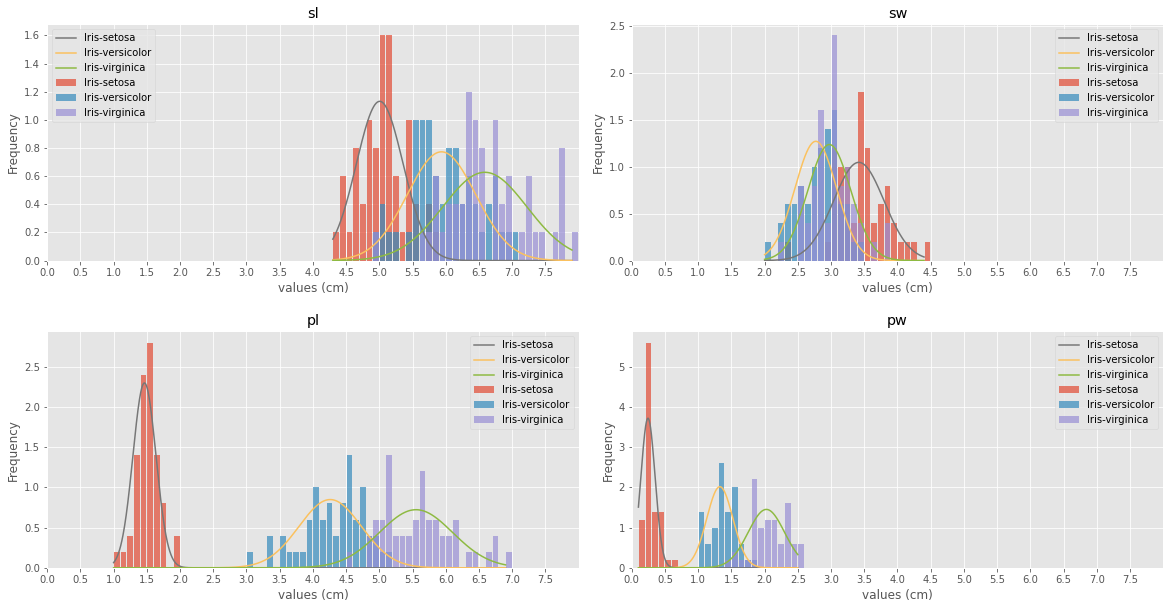

In [20]:
#create subplots: setup 2x2 Axes in one Figure 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
#setup plot grids based on (d)ata
d_tuple = (df_iris.min().min(), df_iris.max().max())
plot_setup(xd_min=d_tuple[0], xd_max=d_tuple[1], x_grid=0.5, xlabel='values (cm)')
#Histogram binning setup based on (d)ata, bin width = data granularity of 0.1 cm
d_bins = histogram_bins(d_min=d_tuple[0], d_max=d_tuple[1], d_binw=0.1)

columns = df_iris.columns.tolist()[0:-1] #all but last column 'species' (classes)
for idx, column in enumerate(columns):
    x_values = np.linspace(df_iris[column].min(), df_iris[column].max(), 1000)
    df_iris.groupby('species')[column].plot.hist(ax=axes[int(idx/2),idx%2],
                                                 density=True,
                                                 bins=d_bins,
                                                 rwidth=0.85, alpha=0.7,
                                                 title=column, legend=True)
    
    df_iris_grouped = df_iris.groupby('species')[column] #for each group: tuple of (name, subsetted object)
    for species, group in df_iris_grouped:
        axes[int(idx/2),idx%2].plot(x_values,
                                    stats.norm.pdf(x_values, group.mean(), group.std()),
                                    label=species) #use groupby to get the species label!
        
    axes[int(idx/2),idx%2].legend()

#plt.savefig('images/iris_NormalPDF_vs_histogram_per_attribute_by_class.png')

**Figure 3.9 - Distribution of petal length in Iris dataset: CORRECT**
- Normal PDF y-values are equal to book's figure

**Observations:**<br>
- similar to the KDE, y-values can also > 1 (function Area still integrates to 1)
- histogram probability density using bin width = 0.1 does match well with Normal PDF
- the real data looks potentially "normal'ish" (with skews for some attribute-classes) given more data points (50 per class)

## 7. Correlation Values 
### Correlation (Heatmap) per-method per-attribute-pair (x,y)

Good discussion of [correlation](https://realpython.com/numpy-scipy-pandas-correlation-python/) (among many resources). Compare:
- Linear Pearson (r) = cov(x,y)/(SDx * SDy) (+1 = perfect positive-slope straight line)
- Rank Spearman (rho) - RANK each attributes' values then do Pearson on ranks (+1 = ever-increasing relationship)
- Rank Kendall (tau) = (concordant pairs - discordant pairs)/#pairs<br>

**Notes**<br>
Correlation heatmap/matrix
- #pairs (unique values) = n(n-1)/2, i.e. "Triangle Number"
    - for Iris dataset: n = 4 attributes => #pairs = 6
- values mirrored across middle diagonal line

**Python**
- **Pandas**: ready-made `corr` returns "correlation matrix" (DataFrame) of values
    - loop through all `method` parameters: `pearson` (default), `spearman`, `kendall`
- **Matplotlib**: `imshow` (image show) works well to create [heatmaps](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) but requires some setup:
    1. Define helper **function** `heatmap_setup`: remove grid, show/label "ticks" (columns), place horizontal ticks on top (like DataFrame output)
    2. choose [color map](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (cmap, vmin, vmax): "diverging" PiYG 
    3. use `text()` to **annotate** data values with **Pandas** `DataFrame.iat[x,y]` 

In [21]:
def heatmap_setup(columns=['x', 'y']):
    """Matplotlib imshow() heatmap plotting customization"""
    
    for ax in axes:
        ax.grid(False)
    
        # Copied from Matplotlib "Creating annotated heatmaps" page
        # We want to show all ticks...
        ax.set_xticks(np.arange(len(columns)))
        ax.set_yticks(np.arange(len(columns)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(columns)
        ax.set_yticklabels(columns)
        # Let the horizontal axes labeling appear on top.
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)
        
#help(heatmap_setup)

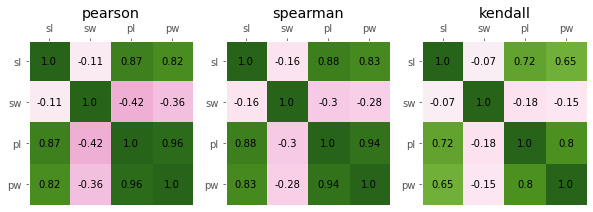

In [22]:
#create subplots: setup 1x3 Axes in one Figure 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

#setup heatmap with columns input
columns = df_iris.columns.tolist()[0:-1] #all but last column 'species'
heatmap_setup(columns)

corr_methods = ['pearson', 'spearman', 'kendall']
for idx, corr_method in enumerate(corr_methods):
    
    df_corr = df_iris.corr(method=corr_method)
    axes[idx].set(title=corr_method)
    axes[idx].imshow(df_corr, cmap='PiYG', vmin=-1, vmax=1, )

    for i in range(len(columns)):
        for j in range(len(columns)):
            axes[idx].text(i, j, df_corr.iat[i, j].round(2), ha='center', va='center',
                            color='black')
            
#plt.savefig('images/iris_correlation_heatmap_per_method_per_attribute_pair.png')

**Observations:**<br>
- comparing sepal measurments (sl vs sw): very low correlation
- comparing **petal measurments** (pl vs pw): strongest positive correlation
- sl vs. pl, pw: next strongest positive correlation
- comparing **methods**: all show similar trends, **Kendall** method is the most "conservative" (values closer to 0)

### Correlation (Heatmap) per-class per-attribute-pair (x,y)
For Pearson method only, let's see how the correlations change when looking per-class.

**Python - Pandas**
- use of a GroupBy object `df_iris_grouped` in for loop as a tuple (name, subsetted object) for each group

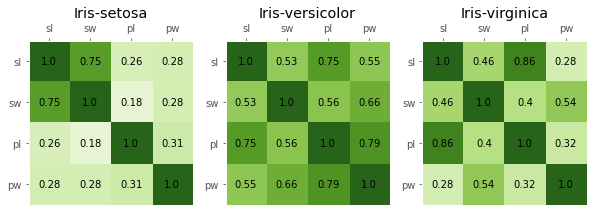

In [23]:
#create subplots: setup 1x3 Axes in one Figure 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

#setup heatmap with columns input
columns = df_iris.columns.tolist()[0:-1] #all but last column 'species'
heatmap_setup(columns)

corr_method = 'pearson'
df_iris_grouped = df_iris.groupby('species') #for each group: tuple of (name, subsetted object)

for idx, df_iris_group in enumerate(df_iris_grouped):
    df_corr = df_iris_group[1].corr(method=corr_method)
    axes[idx].set(title=df_iris_group[0])
    axes[idx].imshow(df_corr, cmap='PiYG', vmin=-1, vmax=1, )

    for i in range(len(columns)):
        for j in range(len(columns)):
            axes[idx].text(i, j, df_corr.iat[i, j].round(2), ha='center', va='center',
                            color='black')

#plt.savefig('images/iris_correlation_heatmap_per_class_per_attribute_pair.png')

**Observations:**<br>
- **quite different results when separating correlation per-class!**
    - thus, correlation matrices for entire dataset heavily influenced by correlations of attributes across classes
- sl vs. sw DOES show some positive correlation, strongest for Iris-setosa
- pl vs. pw ONLY shows strong correlation for Iris-versicolor
- sl vs. pl correlation is strong only for Iris-versicolor and Iris-virginica
- the **Iris-versicolor** species has the most correlated matrix looking at all attributes (**colormap** really helps to see this!)

## 8. Scatter Plots (/6. Outliers)
### Scatter Plot (Matrix) per-attribute-pair (x,y) by-class
Create scatter plots to visualize correlation (and outliers) between attribute pairs. Stratifying by-class is again important here to see class differences.<br>
**Matrix** matches with **Correlation Heatmaps** (above):
- size = n x n
- #pairs (unique values) = n(n-1)/2

**Python:**
- could use **Pandas** `plotting.scatter_matrix` but does not color by-class
- instead, use **Matplotlib** `scatter` per x,y (as above for Correlation Heatmaps), and inside each x,y: **Pandas** `groupby` for by-class
- **include correlation values in legend, beautiful!**
- allow selection of correlation method with corrsponding coefficient name in legend (r, rho, tau)

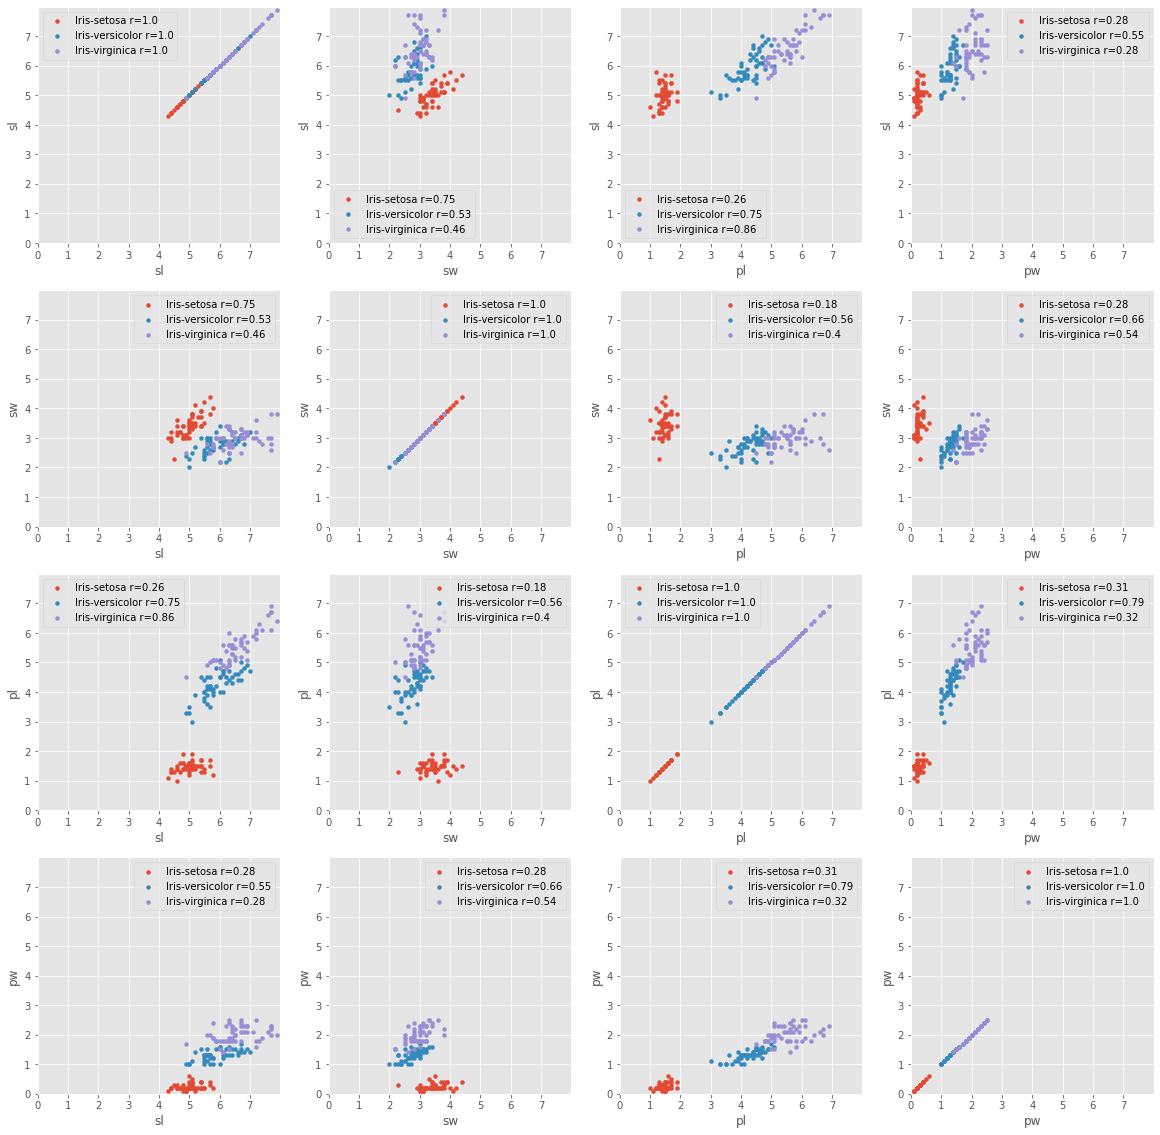

In [24]:
#create subplots: setup 1x1 Axes in one Figure
columns = df_iris.columns.tolist()[0:-1] #all but last column 'species' (classes)
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(20,20))

#setup plot grids based on (d)ata
d_tuple = (df_iris.min().min(), df_iris.max().max())
plot_setup(wspace=0.2, hspace=0.2,
           xd_min=d_tuple[0], xd_max=d_tuple[1], x_grid=1,
           ysetup=True, yd_min=d_tuple[0], yd_max=d_tuple[1], y_grid=1)

corr_vars = dict(pearson='r', spearman='rho', kendall='tau')
corr_method = 'pearson' #'pearson', 'spearman', 'kendall'

#Loop through n x n to create scatter plot for each per-attribute-pair
for x_idx, x_col in enumerate(columns):
    for y_idx, y_col in enumerate(columns):

        ax = axes[y_idx, x_idx] #x, y reversed for axes grid to agree with box arrangement!
        
        #Scatter plot by-class (groupby)
        df_iris_grouped = df_iris.groupby('species') #for each group: tuple of (name, subsetted object)
        for species, group in df_iris_grouped:
            df_corr = group.corr(method=corr_method)
            label = f'{species} {corr_vars[corr_method]}={df_corr.iat[x_idx, y_idx].round(2)}'
            ax.scatter(x=group[x_col], y=group[y_col], label=label, s=15)
            
        ax.set(xlabel=x_col, ylabel=y_col)
        ax.legend()

#plt.savefig('images/iris_scatterplot_matrix_per_attribute_pair_by_class.png')

**Figures 3.12 - Scatter matrix plot of Iris dataset: CORRECT**
- Figure 3.10 - Scatterplot of Iris dataset (pl vs. pw): CORRECT

**Notes:**
- the diagonal x vs x scatter plots are actually distribution-like and helpful, keep!

**Observations:**
- correlation (r) values are not always obvious to see, but generally:
    - thin "line" like scatters indicate higher r -> 1 (or -1)
    - wide "blob" like scatters indicate lower r -> 0
- Yes, Iris-setosa is most separated class, with smaller petals (pl, then pw)
- **Outliers** are even more obvious here with multiple perspectives (vs. Box plots)
    - sl Iris-virginica = 4.9 cm
    - sw Iris-setosa = 2.3 cm

## Conclusions

### Data exploration learnings

**Univariate:**
- quick plot: histogram vs. horizontal box plot
- full plot: histogram vs. KDE **by-class**

**Multvariate:**
- quick plot: correlation heatmap **per-class**
- full plot: scatter plot matrix **by-class** with correlation values

**Nuances, i.e. where all of the fun is!**
- standard deviation N (population) vs. N-1 (sample)
- box plot whisker fences
- correlation methods comparison (Pearson, Spearman, Kendall)

**Learning Process:**<br>
Three parallel learning areas by layers:
1. plan steps around data science/math (theory)
2. Python code to get it calculated/plotted (implementation)
3. actual observations and comparisons (insight!)